# 1) Анализ 210 компаний, входящих в S&P500, с наибольшей капитализацией. Анализ динамики котировок произведен за период 2017 - 2020 год включительно. Из 210 эмитентов отобраны 9 - тех, которые за анализируемый промежуток времени обладали среднегодовой доходностью выше, чем в целом по индексу SP 500 за тот же промежуток времени - то есть выше 16.1%/год, и в то же время которые были наименее скоррелированы со всеми остальными компаниями. Наименее скоррелированные акции отбирались с целью диверсифицировать портфель. 80% портфеля имеет beta-коэффициент 0.9 - 1.2. 2 эмитента имеют beta-коэффициента 1.5 и 1.8.

# 2) Цель - на основе сформированного портфеля проверить доходность за 16 месяцев - до 29.04.2022

# 3) Список тикеров для импорта через библиотеку investpy приведен в файле SP500tickers.xlsx

In [208]:
# Импорт необходимых библиотек
import time
import investpy
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 
import warnings
warnings.filterwarnings("ignore")

In [209]:
stocks = pd.read_excel('C:/Current projects/Другое/SP500tickers.xlsx', header = None)
stocks.rename(columns={0: 'Ticker'}, inplace = True)

list_tickers = []

for i in stocks.Ticker:
    list_tickers.append(i)

# Импорт данных через библиотеку investpy

In [494]:
dfs = list()

for stock in list_tickers:
    
    df = investpy.get_stock_historical_data(stock=stock, 
                                            country='united states',
                                            from_date='01/01/2017',
                                            to_date='29/04/2022')
    
    df['Ticker'] = stock
    df.dropna(inplace=True)
    df.drop(columns = ['Currency', 'Open', 'High', 'Low'], inplace = True)
    df.dropna(inplace=True)
    
    dfs.append(df)
    time.sleep(0.7)

In [493]:
print("Количество акций для дальнейшего анализа: " + str(len(dfs)) + '\n' + 'Период ретроспективного анализа: 01/01/2017 - 29/04/2022' )

Количество акций для дальнейшего анализа: 210
Период ретроспективного анализа: 01/01/2017 - 29/04/2022


# Датафрейм с ценой закрытия всех эмитентов

In [495]:
close_series

,PEG,AFL,PH,BAX,MSCI,EA,DD,YUM,VRSK,ED,EBAY,DFS,AVB,HSY,HAL,MNST,FAST,TDG,WEC,BK,WBA,IFF,WY,RMD,PPG,ES,BIIB,KHC,MTB,AMP,ROK,SIVB,MTD,OKE,TROW,AME,PCAR,EQR,APTV,AWK,BKR,RSG,HES,CBRE,DAL,TSN,LYB,CMI,EXR,ARE,LUV,CERN,EXPE,FRC,ODFL,GLW,ANET,BLL,EIX,KEYS,FITB,DTE,ZBH,MKC,FE,STT,EFX,ANSS,CPRT,IT,CHD,AEE,ETR,MOS,WST,HIG,ABC,TSCO,DHI,MAA,VMC,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,AMD,AES,A,APD,AKAM,ALB,ALK,ALGN,ALLE,LNT,ALL,GOOG,MO,AMZN,AMCR,AAL,AEP,AXP,AIG,AMT,AMGN,APH,ADI,ANTM,AON,APA,AAPL,AMAT,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVY,BAC,BDX,BBY,BIO,TECH,BLK,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CTLT,CAT,CBOE,CDW,CE,CNC,CNP,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CI,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,STZ,CTVA,COST,CCI,CSX,CVS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,43.39,34.88,142.55,44.44,78.71,79.17,57.42,63.21,81.32,73.63,29.84,72.73,176.62,103.92,55.68,45.54,46.95,205.93,58.49,47.96,82.96,117.17,30.36,61.95,95.25,55.08,291.71,87.53,156.74,111.85,138.54,172.12,422.35,58.75,75.84,49.22,65.32,63.63,56.57,72.25,45.30,56.87,62.82,31.57,49.48,62.58,86.88,139.79,77.05,110.58,49.98,49.40,112.44,92.58,86.78,24.30,24.27,37.88,71.75,36.28,27.05,98.21,103.33,46.80,30.95,79.25,118.76,93.35,27.86,99.86,44.34,52.38,72.94,29.53,84.07,47.75,82.61,75.90,27.56,97.32,124.64,178.05,47.50,39.05,62.41,112.36,116.46,36.64,46.19,103.48,170.60,11.43,11.66,46.49,143.40,67.57,88.05,88.00,96.96,64.70,37.93,74.17,786.14,67.63,753.67,0.00,46.30,62.76,75.35,65.12,106.15,150.73,33.72,72.50,143.24,112.08,63.78,29.04,31.94,52.24,94.12,32.47,74.55,76.18,103.50,791.46,70.14,22.53,165.15,42.76,182.91,102.61,386.43,156.97,1477.57,40.07,127.18,21.88,59.45,178.34,65.93,22.41,72.85,25.34,8.30,60.64,88.87,74.48,64.82,52.14,27.00,93.99,73.01,51.54,79.51,29.16,24.59,31.87,76.53,40.20,285.77,117.85,374.77,131.71,135.72,75.79,116.32,30.54,60.59,35.86,90.13,121.02,114.40,41.53,41.80,56.52,65.54,34.52,68.96,39.76,50.61,154.75,0.00,159.73,86.80,11.96,80.35
2017-01-04,43.69,35.20,142.64,44.75,80.71,80.63,57.85,63.44,81.96,73.56,29.76,73.94,177.35,104.12,55.89,46.02,47.17,207.17,58.94,48.71,82.98,117.39,30.63,62.35,97.27,55.27,294.05,87.03,157.70,115.20,137.96,178.98,426.72,58.60,76.97,49.81,66.22,64.28,58.66,72.81,45.10,56.97,61.93,32.08,50.70,63.47,88.79,139.63,77.46,113.38,51.30,47.93,113.74,92.92,87.14,24.46,25.43,38.45,72.36,36.88,27.42,98.47,104.28,46.66,30.97,82.27,119.34,94.44,28.23,101.79,44.70,52.44,73.26,30.81,85.30,48.55,84.66,76.79,28.23,98.21,127.79,178.32,47.92,39.36,63.29,115.74,116.74,37.36,46.11,104.14,172.00,11.43,11.56,47.10,144.65,68.33,90.70,89.18,97.77,65.93,38.16,74.37,786.90,67.85,757.18,0.00,46.70,62.85,76.26,65.97,106.34,152.87,33.97,72.36,143.05,113.31,63.59,29.00,32.24,52.90,95.09,32.28,74.97,77.52,103.66,793.04,72.14,22.95,164.94,43.77,185.32,104.98,386.66,158.62,1487.29,40.82,131.22,22.08,59.14,177.07,66.37,22.78,72.99,25.57,8.40,61.06,90.30,75.63,66.76,52.82,27.31,93.57,75.88,52.38,80.82,30.12,24.81,33.04,79.32,41.22,291.55,117.82,381.86,131.52,138.72,76.07,117.31,30.10,61.41,36.17,90.27,121.93,115.52,41.76,41.65,57.32,66.26,34.94,69.54,39.09,51.08,157.99,0.00,159.76,87.32,12.21,79.75
2017-01-05,43.76,34.98,141.37,45.05,81.64,78.96,57.57,63.65,81.66,73.72,30.01,72.90,178.43,103.45,56.21,46.19,46.62,206.91,59.02,48.09,83.03,116.10,30.95,61.87,95.62,55.28,293.57,86.53,155.38,113.74,137.74,175.17,422.52,58.83,76.37,49.18,65.14,65.15,58.30,72.93,44.83,57.21,62.10,31.81,49.73,63.80,88.68,137.75,78.47,112.97,50.47,47.65,114.69,92.07,86.11,24.31,25.48,38.43,72.10,36.45,26.64,98.60,104.95,45.74,30.85,81.68,119.98,94.71,28.20,90.56,44.89,52.70,73.00,30.87,85.03,48.35,83.68,75.63,28.35,98.08,127.44,177.71,47.70,39.70,63.77,114.81,114.99,37.94,45.77,105.91,171.88,11.24,11.41,46.54,143.22,69.55,90.39,87.76,94.82,66.29,38.11,74.03,794.02,67.93,780.45,0.0

In [496]:
close_series = pd.read_excel('C:/Current projects/Другое/InvestingDF2017_2022.xlsx', index_col=None)
close_series.index = close_series.iloc[:,0]
close_series.drop(columns='Date', inplace = True)

In [497]:
close_series

,PEG,AFL,PH,BAX,MSCI,EA,DD,YUM,VRSK,ED,EBAY,DFS,AVB,HSY,HAL,MNST,FAST,TDG,WEC,BK,WBA,IFF,WY,RMD,PPG,ES,BIIB,KHC,MTB,AMP,ROK,SIVB,MTD,OKE,TROW,AME,PCAR,EQR,APTV,AWK,BKR,RSG,HES,CBRE,DAL,TSN,LYB,CMI,EXR,ARE,LUV,CERN,EXPE,FRC,ODFL,GLW,ANET,BLL,EIX,KEYS,FITB,DTE,ZBH,MKC,FE,STT,EFX,ANSS,CPRT,IT,CHD,AEE,ETR,MOS,WST,HIG,ABC,TSCO,DHI,MAA,VMC,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,AMD,AES,AFL.1,A,APD,AKAM,ALB,ALK,ARE.1,ALGN,ALLE,LNT,ALL,GOOG,MO,AMZN,AMCR,AEE.1,AAL,AEP,AXP,AIG,AMT,AWK.1,AMP.1,ABC.1,AME.1,AMGN,APH,ADI,ANSS.1,ANTM,AON,APA,AAPL,AMAT,APTV.1,ANET.1,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB.1,AVY,BKR.1,BLL.1,BAC,BAX.1,BDX,BBY,BIO,TECH,BIIB.1,BLK,BK.1,BA,BKNG,BWA,BXP,BSX,BMY,AVGO,BR,BRO,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CTLT,CAT,CBOE,CBRE.1,CDW,CE,CNC,CNP,CERN.1,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD.1,CI,CINF,CTAS,CSCO,C,CFG,CTXS,CLX,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED.1,STZ,CPRT.1,GLW.1,CTVA,COST,CCI,CSX,CMI.1,CVS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,43.39,34.88,142.55,44.44,78.71,79.17,57.42,63.21,81.32,73.63,29.84,72.73,176.62,103.92,55.68,45.54,46.95,205.93,58.49,47.96,82.96,117.17,30.36,61.95,95.25,55.08,291.71,87.53,156.74,111.85,138.54,172.12,422.35,58.75,75.84,49.22,65.32,63.63,56.57,72.25,45.30,56.87,62.82,31.57,49.48,62.58,86.88,139.79,77.05,110.58,49.98,49.40,112.44,92.58,86.78,24.30,24.27,37.88,71.75,36.28,27.05,98.21,103.33,46.80,30.95,79.25,118.76,93.35,27.86,99.86,44.34,52.38,72.94,29.53,84.07,47.75,82.61,75.90,27.56,97.32,124.64,178.05,47.50,39.05,62.41,112.36,116.46,36.64,46.19,103.48,170.60,11.43,11.66,34.88,46.49,143.40,67.57,88.05,88.00,110.58,96.96,64.70,37.93,74.17,786.14,67.63,753.67,0.00,52.38,46.30,62.76,75.35,65.12,106.15,72.25,111.85,82.61,49.22,150.73,33.72,72.50,93.35,143.24,112.08,63.78,29.04,31.94,56.57,24.27,52.24,94.12,32.47,74.55,76.18,103.50,791.46,176.62,70.14,45.30,37.88,22.53,44.44,165.15,42.76,182.91,102.61,291.71,386.43,47.96,156.97,1477.57,40.07,127.18,21.88,59.45,178.34,65.93,22.41,72.85,25.34,8.30,60.64,88.87,74.48,64.82,52.14,27.00,93.99,73.01,31.57,51.54,79.51,29.16,24.59,49.40,31.87,76.53,40.20,285.77,117.85,374.77,131.71,44.34,135.72,75.79,116.32,30.54,60.59,35.86,90.13,121.02,114.40,41.53,41.80,56.52,65.54,34.52,68.96,39.76,50.61,73.63,154.75,27.86,24.30,0.00,159.73,86.80,11.96,139.79,80.35
2017-01-04,43.69,35.20,142.64,44.75,80.71,80.63,57.85,63.44,81.96,73.56,29.76,73.94,177.35,104.12,55.89,46.02,47.17,207.17,58.94,48.71,82.98,117.39,30.63,62.35,97.27,55.27,294.05,87.03,157.70,115.20,137.96,178.98,426.72,58.60,76.97,49.81,66.22,64.28,58.66,72.81,45.10,56.97,61.93,32.08,50.70,63.47,88.79,139.63,77.46,113.38,51.30,47.93,113.74,92.92,87.14,24.46,25.43,38.45,72.36,36.88,27.42,98.47,104.28,46.66,30.97,82.27,119.34,94.44,28.23,101.79,44.70,52.44,73.26,30.81,85.30,48.55,84.66,76.79,28.23,98.21,127.79,178.32,47.92,39.36,63.29,115.74,116.74,37.36,46.11,104.14,172.00,11.43,11.56,35.20,47.10,144.65,68.33,90.70,89.18,113.38,97.77,65.93,38.16,74.37,786.90,67.85,757.18,0.00,52.44,46.70,62.85,76.26,65.97,106.34,72.81,115.20,84.66,49.81,152.87,33.97,72.36,94.44,143.05,113.31,63.59,29.00,32.24,58.66,25.43,52.90,95.09,32.28,74.97,77.52,103.66,793.04,177.35,72.14,45.10,38.45,22.95,44.75,164.94,43.77,185.32,104.98,294.05,386.66,48.71,158.62,1487.29,40.82,131.22,22.08,59.14,177.07,66.37,22.78,72.99,25.57,8.40,61.06,90.30,75.63,66.76,52.82,27.31,93.57,75.88,32.08,52.38,80.82,30.12,24.81,47.93,33.04,79.32,41.22,291.55,117.82,381.86,131.52,44.70,138.72,76.07,117.31,30.10,61.41,36.17,90.27,121.93,115.52,41.76,41.65,57.32,66.26,34.94,69.54,39.09,51.08,73.56,157.99,28.23,24.46,0.00,159.76,87.32,12.21,139.63,79.75
2017-01-05,43.76,34.98,141.37,45.05,81.64,78.96,57.57,63.65,81.66,73.72,30.01,72.90,178.43,103.45,56.21,46.19,46.62,206.91,59.02,48.09,83.03,116.10,30.95,61.87,95.62,55.28,293.57,86.53,155.38,113.74,137.74,175.17,422.

In [419]:
# df for close_series
pd.set_option('display.max_columns', None)
close_series = pd.DataFrame()

for i in range(len(dfs)):
    close_series[i]=dfs[i].Close

close_series.columns = list_tickers
close_series.fillna(0, inplace = True)

#Cоздание клона дф
yields = close_series

In [357]:
writer2 = pd.ExcelWriter('C:/Current projects/Другое/InvestingDF2017_2022.xlsx') 

# write dataframe to excel 
close_series.to_excel(writer2) 

# save the excel 
writer2.save() 

print('DataFrame is successfully written to Excel File.')

DataFrame is successfully written to Excel File.


# Датафрейм с доходностью к предыдущему дню

In [420]:
yields = yields.apply(lambda x: (x.pct_change()*100).round(2))
yields.fillna(0, inplace = True)
yields.drop('2019-01-17', inplace = True)
# yields

# Cписок с теми компаниями, которые за 2017 - 2020 календарный год в среднем за год показывали больше 17% доходности

In [421]:
# Cоздаём словарь с парой значений тикер - средняя годовая доходность за 2017-2020
max_yields_df = {}
for i in range(close_series.shape[1]):
    if close_series.iloc[0,i] == 0:
        continue
    elif ((close_series.iloc[-335,i] / close_series.iloc[0,i] -1) / 4).round(3) > 0.17:
        max_yields_df[close_series.columns[i]] = ((close_series.iloc[-335,i] / close_series.iloc[0,i] -1) / 4).round(3)

# Датафрейм с Close values за 01/01/2017 - 12/31/2020 только для эмитентов с доходностью, соответствующей заданному фильтру (диверсификация портфеля только для НАИМЕНЕЕ скоррелированных эмитентов)

In [422]:
close_series_after_filteringannualyields = close_series[max_yields_df.keys()]
close_series_after_filteringannualyields = close_series_after_filteringannualyields.iloc[:close_series_after_filteringannualyields.shape[0] - 587:,:]
# Удаление задублировавшихся столбцов
close_series_after_filteringannualyields = close_series_after_filteringannualyields.loc[:,~close_series_after_filteringannualyields.columns.duplicated()]

In [ ]:
# 1. Мы уже посчитали доходность и отобрали эмитентов с доходностью выше 17% годовых в течение 2017, 2018, 2019, 2020 года
# 2. Теперь за тот же промежуток времени найдем корреляцию между котировками акций отобранных эмитентов

In [498]:
close_series_after_filteringannualyields

,PH,BAX,MSCI,EA,YUM,VRSK,EBAY,MNST,TDG,RMD,AMP,ROK,SIVB,MTD,TROW,AME,APTV,AWK,RSG,CBRE,ODFL,ANET,BLL,KEYS,MKC,ANSS,CPRT,CHD,WST,TSCO,DHI,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AES,A,APD,ALGN,ALLE,GOOG,AMZN,AMT,APH,ADI,ANTM,AON,AAPL,AMAT,AJG,ADSK,ADP,AVY,BBY,BIO,TECH,BLK,AVGO,BR,BRO,CDNS,CZR,CTLT,CAT,CDW,CNC,CRL,CHTR,CMG,CTAS,COST,CCI,CSX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,142.55,44.44,78.71,79.17,63.21,81.32,29.84,45.54,205.93,61.95,111.85,138.54,172.12,422.35,75.84,49.22,56.57,72.25,56.87,31.57,86.78,24.27,37.88,36.28,46.80,93.35,27.86,44.34,84.07,75.90,27.56,39.05,62.41,112.36,116.46,36.64,103.48,11.43,11.66,46.49,143.40,96.96,64.70,786.14,753.67,106.15,33.72,72.50,143.24,112.08,29.04,31.94,52.24,76.18,103.50,70.14,42.76,182.91,102.61,386.43,178.34,65.93,22.41,25.34,8.30,27.00,93.99,51.54,29.16,76.53,285.77,374.77,116.32,159.73,86.80,11.96
2017-01-04,142.64,44.75,80.71,80.63,63.44,81.96,29.76,46.02,207.17,62.35,115.20,137.96,178.98,426.72,76.97,49.81,58.66,72.81,56.97,32.08,87.14,25.43,38.45,36.88,46.66,94.44,28.23,44.70,85.30,76.79,28.23,39.36,63.29,115.74,116.74,37.36,104.14,11.43,11.56,47.10,144.65,97.77,65.93,786.90,757.18,106.34,33.97,72.36,143.05,113.31,29.00,32.24,52.90,77.52,103.66,72.14,43.77,185.32,104.98,386.66,177.07,66.37,22.78,25.57,8.40,27.31,93.57,52.38,30.12,79.32,291.55,381.86,117.31,159.76,87.32,12.21
2017-01-05,141.37,45.05,81.64,78.96,63.65,81.66,30.01,46.19,206.91,61.87,113.74,137.74,175.17,422.52,76.37,49.18,58.30,72.93,57.21,31.81,86.11,25.48,38.43,36.45,45.74,94.71,28.20,44.89,85.03,75.63,28.35,39.70,63.77,114.81,114.99,37.94,105.91,11.24,11.41,46.54,143.22,94.82,66.29,794.02,780.45,105.97,33.78,71.32,144.57,113.48,29.15,32.10,53.02,76.93,103.04,71.43,42.64,185.93,103.17,382.54,174.28,66.03,22.53,25.66,8.55,26.90,93.00,51.87,30.07,80.56,296.17,391.89,116.28,162.91,87.24,12.33
2017-01-06,141.49,45.52,83.40,79.01,64.42,82.38,31.05,45.62,210.51,62.14,115.66,138.51,177.52,432.56,75.62,50.07,57.94,72.84,57.03,31.20,86.10,25.32,38.60,36.20,45.70,93.95,28.34,44.87,86.63,75.16,27.85,40.78,63.79,115.42,116.30,37.91,108.30,11.32,11.82,47.99,144.36,94.08,65.89,806.15,795.99,105.27,34.04,71.60,144.35,114.35,29.48,32.04,53.14,79.30,103.11,72.40,42.77,187.51,103.72,384.30,176.59,66.30,22.45,25.65,8.90,26.88,93.04,51.69,30.52,80.83,298.16,398.44,116.70,162.83,85.50,12.51
2017-01-09,140.78,46.17,82.68,78.64,64.60,81.73,30.75,44.40,209.87,63.26,115.20,138.31,174.33,426.38,72.83,49.63,57.01,71.35,56.42,31.13,85.63,24.88,37.99,36.10,45.07,94.29,28.27,44.30,86.84,75.37,27.96,40.74,64.21,117.11,115.00,37.70,108.57,11.49,11.53,48.14,146.31,94.79,65.42,806.65,796.92,105.02,33.69,71.94,142.79,113.40,29.75,32.78,52.40,79.59,102.47,72.56,43.34,188.38,103.24,380.42,176.97,66.15,22.33,25.72,9.15,26.91,92.37,51.17,30.98,80.60,296.26,395.06,115.48,160.97,85.73,12.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,206.44,84.69,260.36,108.55,100.33,149.17,36.21,63.47,560.41,156.70,167.72,202.84,252.07,790.47,122.20,99.71,94.89,121.62,89.58,60.59,125.33,51.16,65.23,103.22,84.12,256.49,90.91,70.35,150.73,93.56,53.20,87.28,89.85,172.30,211.61,58.81,329.64,46.54,19.76,85.30,235.05,277.89,123.87,1343.56,1789.21,227.08,53.62,119.72,304.50,207.70,71.07,61.50,94.56,183.91,169.91,133.22,87.93,368.76,220.74,499.64,320.50,123.06,39.17,69.65,59.18,56.02,147.48,142.97,63.23,151.31,480.86,828.89,268.81,294.23,140.04,24.33
2019-12-26,207.63,84.33,260.48,108.51,101.79,148.83,36.25,63.88,565.28,155.79,167.68,204.22,253.18,791.98,122.87,100.07,95.72,121.88,89.56,61.28,125.50,51.40,64.91,103.65,84.81,258.33,91.02,70.37,150.77,92.48,53.01,87.28,89.83,171.01,212.05,58.89,331.20,46.63,19.93,85.45,236.08,278.26,124.64,1360.40,1868.77,227.8

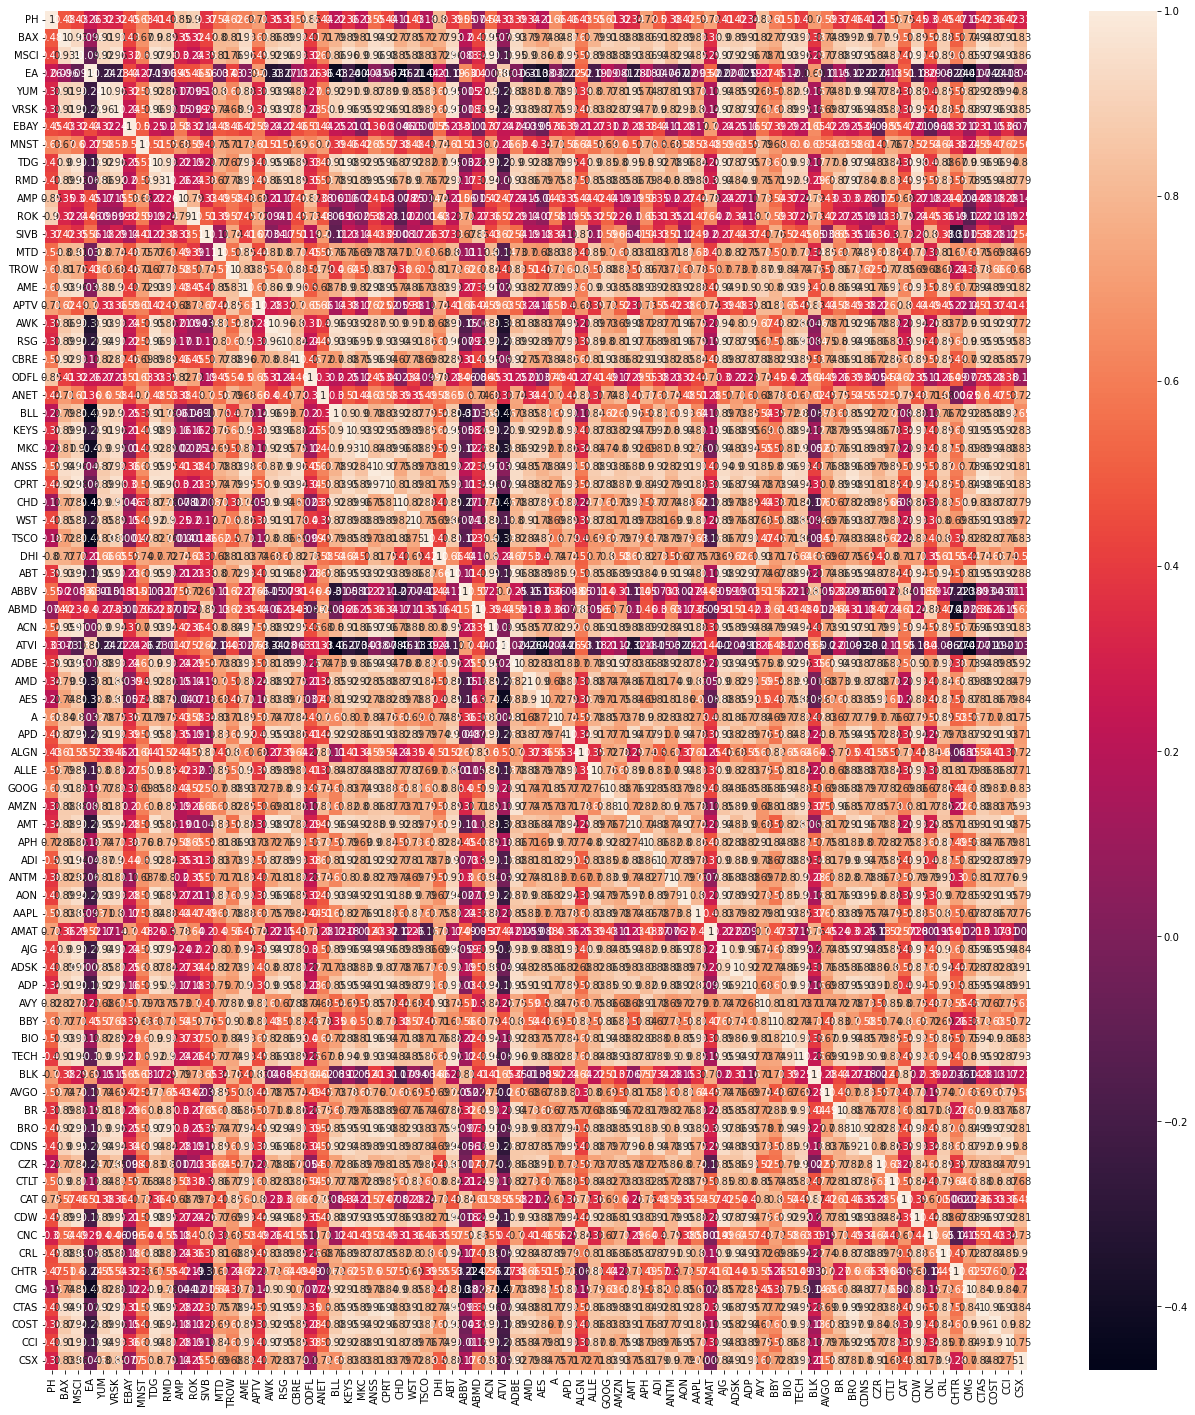

In [500]:
import seaborn as sn
import matplotlib.pyplot as plt

corr = close_series_after_filteringannualyields.corr()


from matplotlib import rcParams

rcParams['figure.figsize'] = 22,25
p = sn.heatmap(corr, annot=True)

In [432]:
corr_adjusted = list()
for i in corr:
    if corr[i][1].mean() < 0.744:
        corr_adjusted.append(i)
print('Количество эмитентов, прошедших первичный отбор на корреляцию: ' + str(len(corr_adjusted)))

Количество эмитентов, прошедших первичный отбор на корреляцию: 48


# Фильтруем словарь max_yields_df с парой значений тикер - среднегодовая доходность за 2017-2020 года, основываясь на списке отобранных эмитентов в списке corr_adjusted

In [433]:
yieldsandcorrelation_passed = {k: v for k, v in max_yields_df.items() if k in corr_adjusted}

In [ ]:
# Повторный анализ корреляции изменения котировок между оставшимися 10 эмитентами

In [434]:
secondcorrelation = close_series[yieldsandcorrelation_passed.keys()].reset_index().drop(columns='Date').iloc[:close_series_after_filteringannualyields.shape[0] - 587:,:]
secondcorr = secondcorrelation.corr()

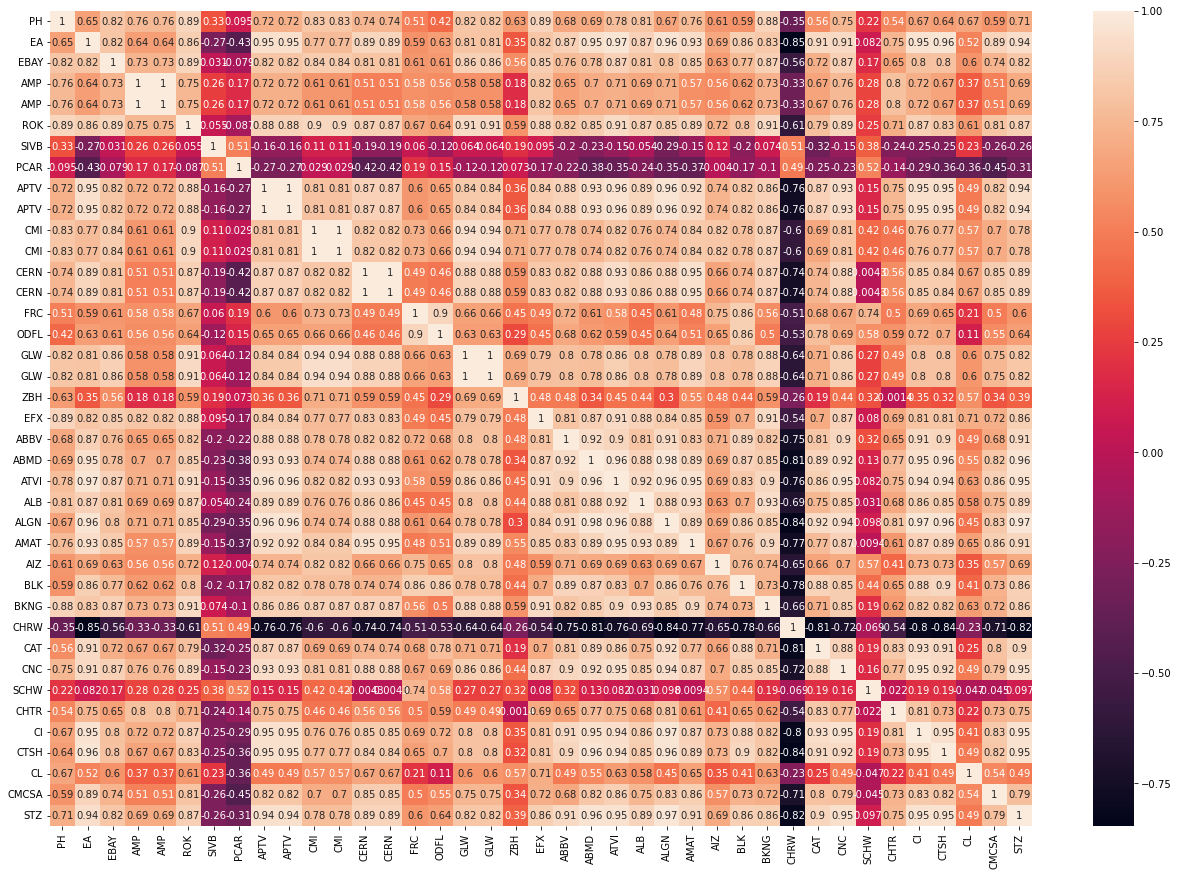

In [271]:
rcParams['figure.figsize'] = 22,15
p = sn.heatmap(secondcorr, annot=True)

In [435]:
secondcorr = secondcorr.loc[:,~secondcorr.columns.duplicated()]

In [450]:
corr_adjusted_2nd = list()

for i in range(secondcorr.shape[1]):
    if secondcorr.iloc[:,i].mean() < 0.775:
        
        corr_adjusted_2nd.append(i)
        
secondcorr.iloc[:,corr_adjusted_2nd].columns

Index(['PH', 'EBAY', 'AMP', 'SIVB', 'ODFL', 'BBY', 'BLK', 'CAT', 'CHTR'], dtype='object')

In [451]:
print('Количество эмитентов, прошедших первичный отбор на корреляцию: ' + str(len(corr_adjusted_2nd)))

Количество эмитентов, прошедших первичный отбор на корреляцию: 9


In [ ]:
# Фильтрация словаря с эмитентами после повторного отбора по признаку наименьшей скоррелированности движения котировок

In [452]:
yieldsandcorrelation_passed = {k: v for k, v in yieldsandcorrelation_passed.items() if k in secondcorr.iloc[:,corr_adjusted_2nd].columns}

# Добавляем в словарь помимо показателя доходности еще и бета-коэффициент

In [453]:
# Добавляем в словарь значения B-коэффициентов - списком после значения среднегодовой доходности

yieldsandcorrelation_passed['PH'] = [0.455, 1.57]        # Parker Hannifin Corp.
yieldsandcorrelation_passed['EBAY'] = [0.171, 1.15]      # Ebay
yieldsandcorrelation_passed['AMP'] = [0.184, 1.5]        # Ameriprise Financial Inc
yieldsandcorrelation_passed['SIVB'] = [0.184, 1.8]       # SVB Financial Group
yieldsandcorrelation_passed['ODFL'] = [0.312, 1.03]      # Old Dominion Freight Line Inc
yieldsandcorrelation_passed['AMAT'] = [0.425, 0.9]       # Applied Materials
yieldsandcorrelation_passed['BLK'] = [0.217, 1.29]       # BlackRock Inc
yieldsandcorrelation_passed['CAT'] = [0.234, 0.93]       # Caterpillar Inc
yieldsandcorrelation_passed['CHTR'] = [0.329, 1.03]      # Charter Communications Inc
    
yieldsandcorrelation_passed

{'PH': [0.455, 1.57],
 'EBAY': [0.171, 1.15],
 'AMP': [0.184, 1.5],
 'SIVB': [0.184, 1.8],
 'ODFL': [0.312, 1.03],
 'AMAT': [0.425, 0.9],
 'BLK': [0.217, 1.29],
 'CAT': [0.234, 0.93],
 'CHTR': [0.329, 1.03]}

In [454]:
yieldsandcorrelation_passed = pd.DataFrame(yieldsandcorrelation_passed).T
yieldsandcorrelation_passed.rename(columns={0: 'Доходность', 1: 'Бета-коэффициент'}, inplace = True)
yieldsandcorrelation_passed

In [504]:
close_series.PH[:754]

Date
2017-01-03    142.55
2017-01-04    142.64
2017-01-05    141.37
2017-01-06    141.49
2017-01-09    140.78
               ...  
2019-12-24    206.44
2019-12-26    207.63
2019-12-27    207.00
2019-12-30    205.76
2019-12-31    205.82
Name: PH, Length: 754, dtype: float64

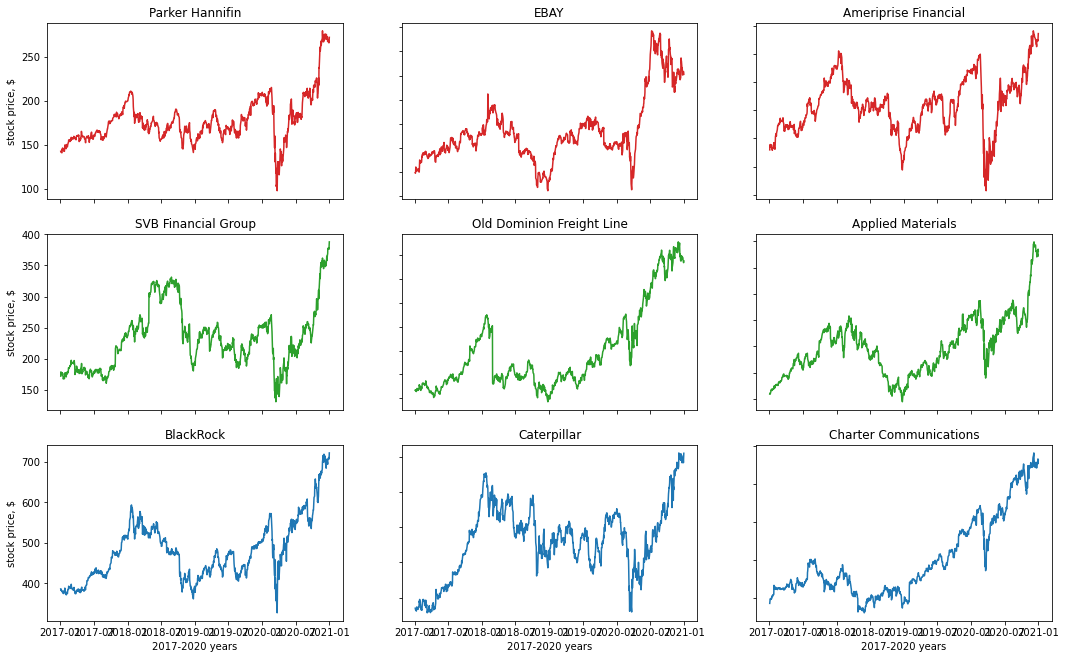

In [510]:
fig, axs = plt.subplots(3, 3)

axs[0, 0].plot(close_series.PH[:1007], 'tab:red')
axs[0, 0].set_title('Parker Hannifin')

axs[0, 1].plot(close_series.EBAY[:1007], 'tab:red')
axs[0, 1].set_title('EBAY')

axs[0, 2].plot(close_series.AMP[:1007], 'tab:red')
axs[0, 2].set_title('Ameriprise Financial')

axs[1, 0].plot(close_series.SIVB[:1007], 'tab:green')
axs[1, 0].set_title('SVB Financial Group')

axs[1, 1].plot(close_series.ODFL[:1007], 'tab:green')
axs[1, 1].set_title('Old Dominion Freight Line')

axs[1, 2].plot(close_series.AMAT[:1007], 'tab:green')
axs[1, 2].set_title('Applied Materials')

axs[2, 0].plot(close_series.BLK[:1007], 'tab:blue')
axs[2, 0].set_title('BlackRock')

axs[2, 1].plot(close_series.CAT[:1007], 'tab:blue')
axs[2, 1].set_title('Caterpillar')

axs[2, 2].plot(close_series.CHTR[:1007], 'tab:blue')
axs[2, 2].set_title('Charter Communications')

for ax in axs.flat:
    ax.set(xlabel='2017-2020 years', ylabel='stock price, $')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
rcParams['figure.figsize'] = 18,15

In [480]:
yieldsandcorrelation_passed

,Доходность,Бета-коэффициент
PH,0.455,1.57
EBAY,0.171,1.15
AMP,0.184,1.50
SIVB,0.184,1.80
ODFL,0.312,1.03
AMAT,0.425,0.90
BLK,0.217,1.29
CAT,0.234,0.93
CHTR,0.329,1.03


In [ ]:

1. Все 9 эмитентов, оставшиеся после фильтрации за период 2017 - 2020 год (включительно), 
обладают среднегодовой доходностью > 17%; 
Доходность индекса S&P 500 за то же время составил 16.1%. То есть все остальные компании были исключены из анализа
либо из-за недостаточной среднегодовой доходности, либо из-за зашкаливающей скоррелированности с бумагами других эмитентов.


2. У всех этих эмитентов диапазон бета-коэффициентов находится в интервале 0.9 - 1.8. 
SVB Financial Group (1.5), Ameriprise Financials (1.8) - эмитенты, чьи бумаги обладают повышенной волатильностью 
относительно среднего показателя по рынку. То есть наиболее "рискованные" активы. Все остальные бумаги целесообразно
классифицировать либо в качестве консервативных (0.9 - 1.2 бета), либо умеренно-консервативных (1.2 - 1.5 бета).

3. Котировки акций 9 оставшихся после фильтрации эмитентов слабо скоррелированы между собой. 
Это позволяет дополнительно диверсифицировать риск потери капитала: если котировки одного из эмитентов пойдут вниз, 
это не будет означать, что весь опортфель обязательно последует вслед за ним.

4. В дополнение к пункту 3: портфель, основанный на акциях отобранных эмитентах хорошо диверсифицирован с точки зрения
отраслевой принадлежности:
    "PH" = Производитель гидравлического оборудования;
    "EBAY" = Конгломерат интернет-аукционов и интернет-магазинов;
    "SIVB" = Финансы;
    "ODFL" = Транспортная компания;
    "AMAT" = Производство и обслуживание оборудования для производства и эксплуатации полупроводниковой продукции;
    "BLK" = Одна из крупнейших международная инвестиционная компания;
    "CAT" = Один из крупнейших мировых производителей строительной и горнодобывающей техники.;
    "CHTR" = Телекоммуникационная компания и компания средств массовой информации, предоставляющая услуги под брендом Spectrum;

5. Исходя из пункта 4 можно сделать вывод, 
что сформированный портфель будет слабо подвержен колебаниям отдельно взятой отрасли.

6. Исходя из графика динамики котировок за последние 4 года (2017 - 2020 включительно), мы видим, что на анализируемом отрезке
времени котировки для всех 9 эмитентов достигают (как минимум) локального максимума. Лично для меня это является негативным
аспектом, т.к может свидетельствовать о "перегретости" бумаги. В условиях реального времени я бы либо 
не стал покупать эти бумаги вовсе, либо подождал более удобной точки входа 
(чтобы акции подешевели на 10-15% от текущих значений);


# Перейдем в эксель для расчёта оптимальных долей портфеля на основе пары риск-доходность.

In [490]:
close_series = close_series.loc[:,~close_series.columns.duplicated()]
writer = pd.ExcelWriter('C:/Current projects/Другое/output.xlsx') 

# write dataframe to excel 
yieldsandcorrelation_passed.to_excel(writer) 
close_series[yieldsandcorrelation_passed.index].to_excel(writer, 'Close-series')

# save the excel 
writer.save() 

print('DataFrame is successfully written to Excel File.')


DataFrame is successfully written to Excel File.


In [530]:
end = close_series[yieldsandcorrelation_passed.index].iloc[-334:,:]

# Выставляются заявки take-profit, когда стоимость акции достигает +35% от стоимости покупки; Продажа до 29.04.2022 не осуществляется, если не была выставлена заявка take-profit

In [829]:
for j in range (end.shape[1]):
    for i in range(end.shape[0]):
        while end.iloc[i,j] < end.iloc[0,j]*1.35 and i < end.shape[0]-1:
            i+=1
            if i == end.shape[0]-2:
                print(str(end.columns[j]) + str(' - hasnt been sold yet |  current profit/loss = ') + str((end.iloc[-1,j] / end.iloc[0,j]-1).round(2)*100) + '%')   
                j+=1
                i=0
            elif end.iloc[i,j] >= end.iloc[0,j]*1.35:
                print(str(end.columns[j]) + " - "  + str('sold with 35% profit') + " | " + str(end.iloc[i,:].name.strftime("%Y-%m-%d")))
                j+=1
                i=0

PH - hasnt been sold yet |  current profit/loss = 2.0%
EBAY - sold with 35% profit | 2021-06-29
AMP - sold with 35% profit | 2021-04-27
SIVB - sold with 35% profit | 2021-02-16
ODFL - sold with 35% profit | 2021-04-23
AMAT - sold with 35% profit | 2021-02-16
BLK - sold with 35% profit | 2021-11-08
CAT - hasnt been sold yet |  current profit/loss = 16.0%
CHTR - hasnt been sold yet |  current profit/loss = -34.0%


IndexError: single positional indexer is out-of-bounds